# NLP Interview Task

## Task

1. Perform an exploratory stratification of biomedical entities based on the text, such as admissions, diseases, or phenotypes, 
2. Exploring hypothetical relationships that can be discovered from the text.
3. The presentation should focus on methodology, findings, and next steps.

## Laod dataset

In [1]:
# import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
patients = pd.read_csv('patients.csv')
pt_notes = pd.read_csv('pt_notes.csv')

In [3]:
patients.head()

,subject_id,gender,dob
0,0,M,1/1/2018
1,1,F,1/1/2018
2,2,F,1/1/2018
3,3,M,1/1/2018
4,4,M,1/1/2018


In [4]:
pt_notes.head()

,Unnamed: 0_x,subject_id,chartdate,category,text,create_year,Unnamed: 0_y,gender,dob,dob_year,age_year
0,6,1,2079-01-01,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",2079,1,F,2018-01-01,2018,61
1,7,1,2079-01-01,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...",2079,1,F,2018-01-01,2018,61
2,8,1,2079-01-01,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",2079,1,F,2018-01-01,2018,61
3,9,2,2037-01-01,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...",2037,2,F,2018-01-01,2018,19
4,10,2,2037-01-01,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese...",2037,2,F,2018-01-01,2018,19


In [5]:
#Checking number of null objects in patients notes
pt_notes.isna().sum() 

Unnamed: 0_x    0
subject_id      0
chartdate       0
category        0
text            0
create_year     0
Unnamed: 0_y    0
gender          0
dob             0
dob_year        0
age_year        0
dtype: int64

#### As we can see, there is no null objects therefore lets understand those columns that has no impact on our analysis and drop them.

In [6]:
# Information about our dataset is inportant
pt_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  1088 non-null   int64 
 1   subject_id    1088 non-null   int64 
 2   chartdate     1088 non-null   object
 3   category      1088 non-null   object
 4   text          1088 non-null   object
 5   create_year   1088 non-null   int64 
 6   Unnamed: 0_y  1088 non-null   int64 
 7   gender        1088 non-null   object
 8   dob           1088 non-null   object
 9   dob_year      1088 non-null   int64 
 10  age_year      1088 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 93.6+ KB


## Data exploration

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: title={'center': 'Gender difference'}, xlabel='gender', ylabel='count'>

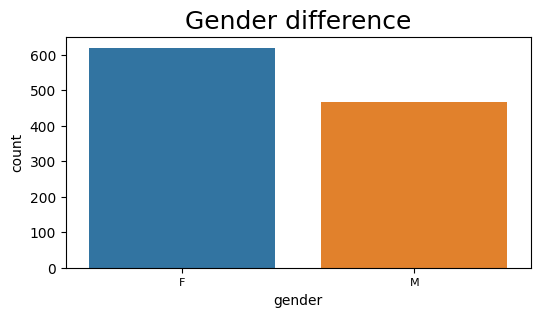

In [8]:
# Explore the gender column

plt.figure(figsize=(6,3))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.ylabel('count')
plt.title('Gender difference', fontsize=18)
sns.countplot(x='gender', data=pt_notes)

In [9]:
# Get the values as well
gender = pt_notes['gender'].value_counts().to_dict()
gender

{'F': 620, 'M': 468}

<AxesSubplot: title={'center': 'No. of patients in an age group'}, xlabel='age_year', ylabel='count'>

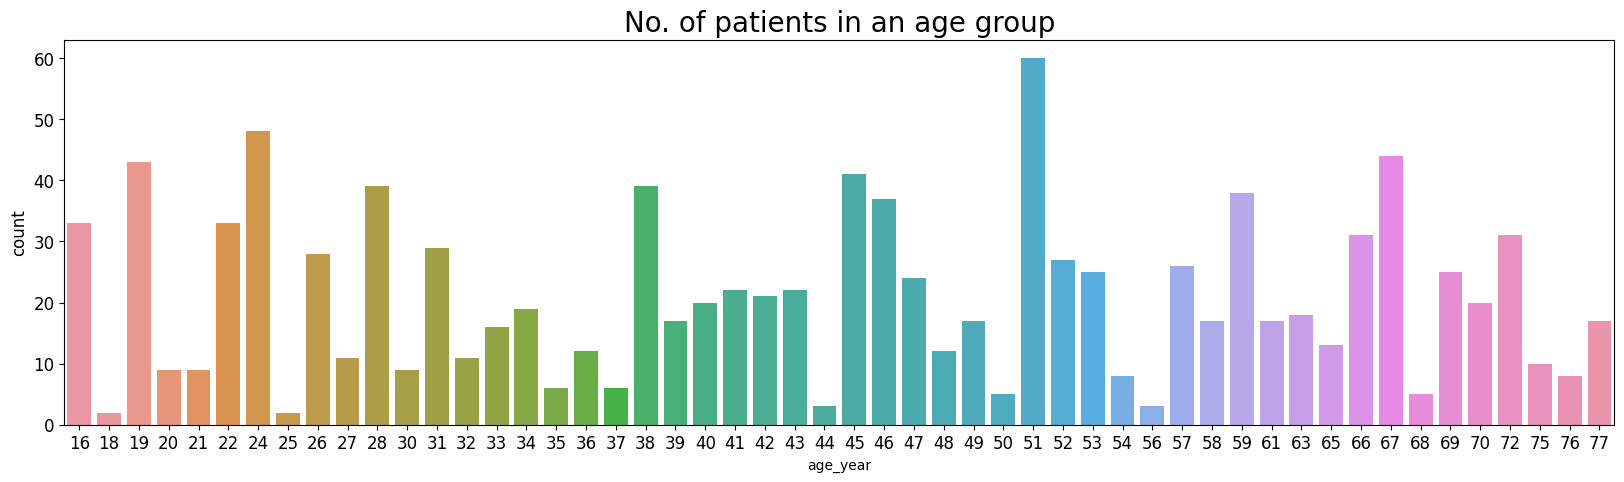

In [10]:
# Lets also look at the number if patients in an age group
plt.figure(figsize=(20,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('No. of patients in an age group', fontsize=20)
sns.countplot(x='age_year', data=pt_notes)

In [11]:
# We can still count to know the exact numbers
# Get the values as well
age_group = pt_notes['age_year'].value_counts().to_dict()
age_group

{51: 60,
 24: 48,
 67: 44,
 19: 43,
 45: 41,
 38: 39,
 28: 39,
 59: 38,
 46: 37,
 16: 33,
 22: 33,
 72: 31,
 66: 31,
 31: 29,
 26: 28,
 52: 27,
 57: 26,
 53: 25,
 69: 25,
 47: 24,
 43: 22,
 41: 22,
 42: 21,
 40: 20,
 70: 20,
 34: 19,
 63: 18,
 58: 17,
 61: 17,
 77: 17,
 39: 17,
 49: 17,
 33: 16,
 65: 13,
 48: 12,
 36: 12,
 27: 11,
 32: 11,
 75: 10,
 21: 9,
 30: 9,
 20: 9,
 54: 8,
 76: 8,
 37: 6,
 35: 6,
 68: 5,
 50: 5,
 44: 3,
 56: 3,
 25: 2,
 18: 2}

#### We can observe that , the hieghtest patients are of age 51 and the second hieghtest are of age 24. Observably, there is no trend of which age group has the most patients.  Therefore lets group them into Teenagers (13-17 age), Young adult (18-25 age), Adult (26-44 age), Middle-age (45-59 age), Old age (60 age) about five sequential patterns. https://www.researchgate.net/figure/Age-group-comparison-between-Young-adult-18-25-age-Adult-26-44-age-Middle-age_tbl1_338842581

In [12]:
pt_notes['Age_patterns'] = pt_notes['age_year'].replace([16], 'Teenagers')
pt_notes['Age_patterns'] = pt_notes['Age_patterns'].replace([18,19,20,21,22,24,25], 'Young adult')
pt_notes['Age_patterns'] = pt_notes['Age_patterns'].replace([26,27,28,30,31,32,33,34,35,36,37,38,39,
                                                         40,41,42,43,44], 'Adult')
pt_notes['Age_patterns']= pt_notes['Age_patterns'].replace([45,46,47,48,49,50,51,52,53,54,56,57,58,59], 'Middlle-age')
pt_notes['Age_patterns'] = pt_notes['Age_patterns'].replace([61,63,65,66,67,68,69,70,72,75,76,77], 'Old age')

In [13]:
age_group = pt_notes['Age_patterns'].value_counts().to_dict()
age_group

{'Middlle-age': 340,
 'Adult': 330,
 'Old age': 239,
 'Young adult': 146,
 'Teenagers': 33}

<AxesSubplot: title={'center': 'No. of patients in an age group'}, xlabel='Age_patterns', ylabel='count'>

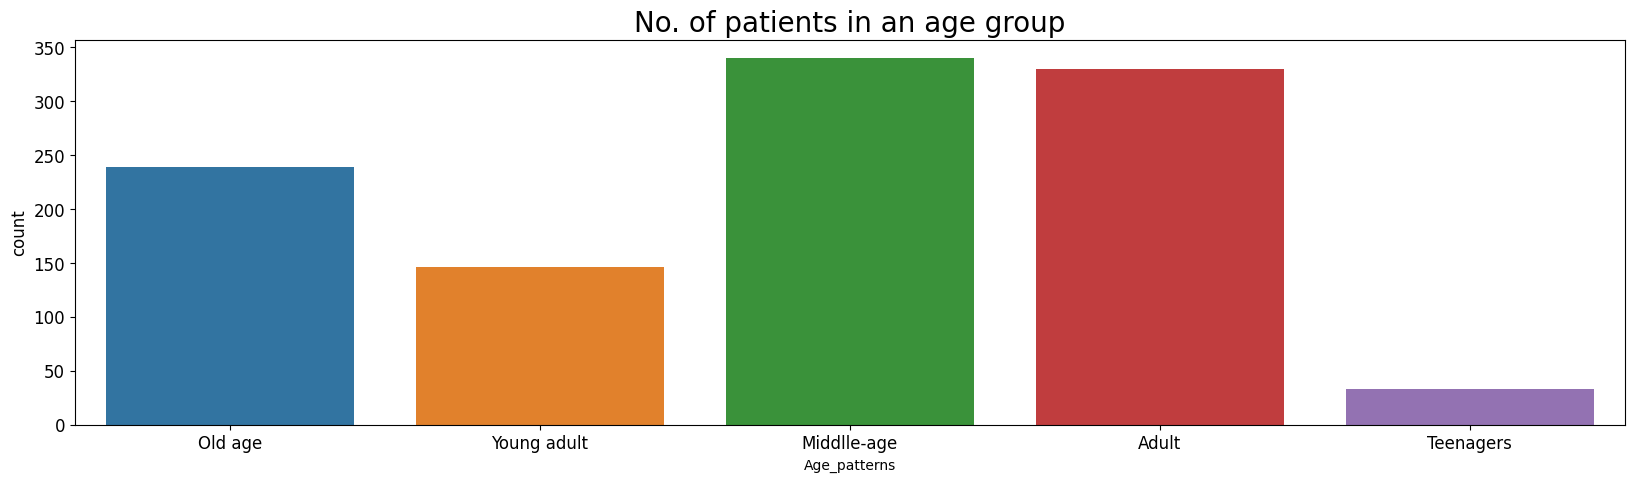

In [14]:
# Lets also look at the number if patients in an age group
plt.figure(figsize=(20,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('No. of patients in an age group', fontsize=20)
sns.countplot(x='Age_patterns', data=pt_notes)

\item
The sequential patterns tells us that most patients are middle-age and adult 


### Explore the category column

<AxesSubplot: title={'center': 'category'}, xlabel='category', ylabel='count'>

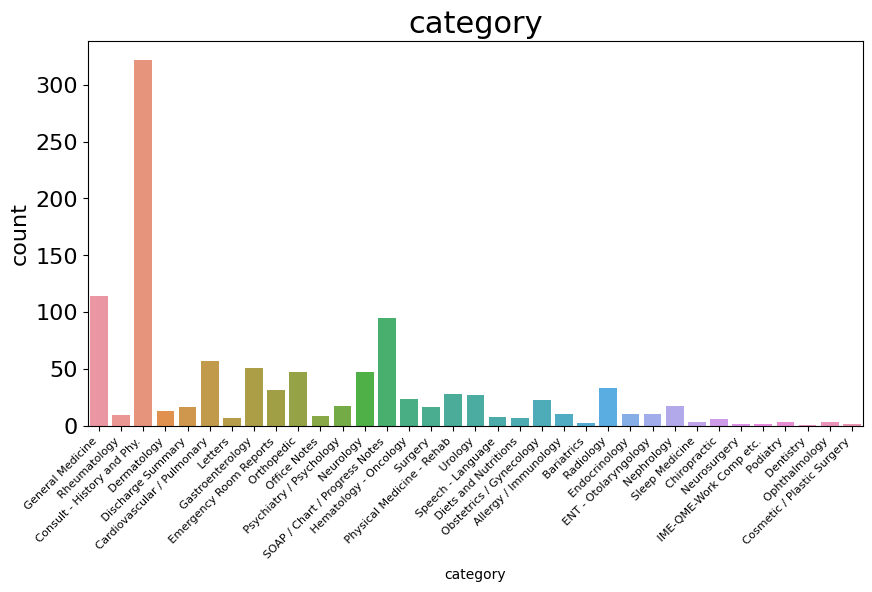

In [15]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('category', fontsize=22)
sns.countplot(x='category', data=pt_notes)

In [16]:
df_cate = pt_notes['category'].value_counts().to_dict()
df_cate

{' Consult - History and Phy.': 322,
 ' General Medicine': 114,
 ' SOAP / Chart / Progress Notes': 95,
 ' Cardiovascular / Pulmonary': 57,
 ' Gastroenterology': 51,
 ' Neurology': 48,
 ' Orthopedic': 48,
 ' Radiology': 34,
 ' Emergency Room Reports': 32,
 ' Physical Medicine - Rehab': 28,
 ' Urology': 27,
 ' Hematology - Oncology': 24,
 ' Obstetrics / Gynecology': 23,
 ' Psychiatry / Psychology': 18,
 ' Nephrology': 18,
 ' Surgery': 17,
 ' Discharge Summary': 17,
 ' Dermatology': 13,
 ' ENT - Otolaryngology': 11,
 ' Allergy / Immunology': 11,
 ' Endocrinology': 11,
 ' Rheumatology': 10,
 ' Office Notes': 9,
 ' Speech - Language': 8,
 ' Diets and Nutritions': 7,
 ' Letters': 7,
 ' Chiropractic': 6,
 ' Sleep Medicine': 4,
 ' Podiatry': 4,
 ' Ophthalmology': 4,
 ' Bariatrics': 3,
 ' Neurosurgery': 2,
 ' IME-QME-Work Comp etc.': 2,
 ' Cosmetic / Plastic Surgery': 2,
 ' Dentistry': 1}

In [17]:
#Finding number of patients in each category
pt_notes.groupby(['category']).size().groupby(level=0).max()

category
 Allergy / Immunology              11
 Bariatrics                         3
 Cardiovascular / Pulmonary        57
 Chiropractic                       6
 Consult - History and Phy.       322
 Cosmetic / Plastic Surgery         2
 Dentistry                          1
 Dermatology                       13
 Diets and Nutritions               7
 Discharge Summary                 17
 ENT - Otolaryngology              11
 Emergency Room Reports            32
 Endocrinology                     11
 Gastroenterology                  51
 General Medicine                 114
 Hematology - Oncology             24
 IME-QME-Work Comp etc.             2
 Letters                            7
 Nephrology                        18
 Neurology                         48
 Neurosurgery                       2
 Obstetrics / Gynecology           23
 Office Notes                       9
 Ophthalmology                      4
 Orthopedic                        48
 Physical Medicine - Rehab         28
 Po

In [18]:
#pt_notes.groupby(['chartdate']).size().groupby(level=0).max()
pt_notes.groupby(['create_year']).size().groupby(level=0).max()

create_year
2034    33
2036     2
2037    43
2038     9
2039     9
2040    33
2042    48
2043     2
2044    28
2045    11
2046    39
2048     9
2049    29
2050    11
2051    16
2052    19
2053     6
2054    12
2055     6
2056    39
2057    17
2058    20
2059    22
2060    21
2061    22
2062     3
2063    41
2064    37
2065    24
2066    12
2067    17
2068     5
2069    60
2070    27
2071    25
2072     8
2074     3
2075    26
2076    17
2077    38
2079    17
2081    18
2083    13
2084    31
2085    44
2086     5
2087    25
2088    20
2090    31
2093    10
2094     8
2095    17
dtype: int64

In [19]:
create_year = pt_notes['create_year'].value_counts().to_dict()
create_year

{2069: 60,
 2042: 48,
 2085: 44,
 2037: 43,
 2063: 41,
 2056: 39,
 2046: 39,
 2077: 38,
 2064: 37,
 2034: 33,
 2040: 33,
 2090: 31,
 2084: 31,
 2049: 29,
 2044: 28,
 2070: 27,
 2075: 26,
 2071: 25,
 2087: 25,
 2065: 24,
 2061: 22,
 2059: 22,
 2060: 21,
 2058: 20,
 2088: 20,
 2052: 19,
 2081: 18,
 2076: 17,
 2079: 17,
 2095: 17,
 2057: 17,
 2067: 17,
 2051: 16,
 2083: 13,
 2066: 12,
 2054: 12,
 2045: 11,
 2050: 11,
 2093: 10,
 2039: 9,
 2048: 9,
 2038: 9,
 2072: 8,
 2094: 8,
 2055: 6,
 2053: 6,
 2086: 5,
 2068: 5,
 2062: 3,
 2074: 3,
 2043: 2,
 2036: 2}

#### We can get better analysis by extracting the date column from the create_year column

We find that 2036 and 2043 has got least number of patients i.e. 2

Highest number of patients are born in the year 2069 i.e. 60


## Sentiment analysis

### Extracting the category and text column for sentiment analysis

In [20]:
metadata = pt_notes[['category','text']]
metadata.head()

,category,text
0,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
1,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
2,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
3,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."
4,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese..."


In [21]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1088 non-null   object
 1   text      1088 non-null   object
dtypes: object(2)
memory usage: 17.1+ KB


#### It shows there are no null objects in text column

In [23]:
# Lets combine the category and the text columns to create extra one
metadata['extract'] = metadata['category'] + ' ' + metadata['text']
metadata

/tmp/ipykernel_27350/1385234637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['extract'] = metadata['category'] + ' ' + metadata['text']


,category,text,extract
0,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","General Medicine HISTORY OF PRESENT ILLNESS:,..."
1,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","Rheumatology HISTORY OF PRESENT ILLNESS: , A ..."
2,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",Consult - History and Phy. HISTORY OF PRESENT...
3,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","Consult - History and Phy. CHIEF COMPLAINT:,1..."
4,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese...","Dermatology SUBJECTIVE:, This is a 29-year-o..."
...,...,...,...
1083,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe...",Cardiovascular / Pulmonary INDICATIONS FOR PR...
1084,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a...",Obstetrics / Gynecology HISTORY OF PRESENT IL...
1085,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a...",SOAP / Chart / Progress Notes HISTORY OF PRES...
1086,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a...",Obstetrics / Gynecology HISTORY OF PRESENT IL...


In [25]:
metadata['extract'] = metadata['extract'].astype(str).str.lower()
metadata.head()

/tmp/ipykernel_27350/1563866728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['extract'] = metadata['extract'].astype(str).str.lower()


,category,text,extract
0,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","general medicine history of present illness:,..."
1,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","rheumatology history of present illness: , a ..."
2,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",consult - history and phy. history of present...
3,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","consult - history and phy. chief complaint:,1..."
4,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese...","dermatology subjective:, this is a 29-year-o..."


### Using Regexp to tokenize the words

In [26]:
from nltk.tokenize import RegexpTokenizer

In [27]:
regexp = RegexpTokenizer('\w+')

metadata['extract_token'] = metadata['extract'].apply(regexp.tokenize)

metadata.head()

/tmp/ipykernel_27350/2541140768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['extract_token'] = metadata['extract'].apply(regexp.tokenize)


,category,text,extract,extract_token
0,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","general medicine history of present illness:,...","[general, medicine, history, of, present, illn..."
1,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","rheumatology history of present illness: , a ...","[rheumatology, history, of, present, illness, ..."
2,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",consult - history and phy. history of present...,"[consult, history, and, phy, history, of, pres..."
3,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","consult - history and phy. chief complaint:,1...","[consult, history, and, phy, chief, complaint,..."
4,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese...","dermatology subjective:, this is a 29-year-o...","[dermatology, subjective, this, is, a, 29, yea..."


### Remove stopwords

In [28]:
import nltk
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [29]:
metadata['extract_token'] = metadata['extract_token'].apply(lambda x: [item for item in x if item not in stopwords])
metadata.head()

/tmp/ipykernel_27350/1397270387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['extract_token'] = metadata['extract_token'].apply(lambda x: [item for item in x if item not in stopwords])


,category,text,extract,extract_token
0,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ...","general medicine history of present illness:,...","[general, medicine, history, present, illness,..."
1,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...","rheumatology history of present illness: , a ...","[rheumatology, history, present, illness, 71, ..."
2,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ...",consult - history and phy. history of present...,"[consult, history, phy, history, present, illn..."
3,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai...","consult - history and phy. chief complaint:,1...","[consult, history, phy, chief, complaint, 1, i..."
4,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese...","dermatology subjective:, this is a 29-year-o...","[dermatology, subjective, 29, year, old, vietn..."


In [30]:
#Convert our tokens to string
metadata['extract_string'] = metadata['extract_token'].apply(lambda x:
                                                            ' '.join([item for item in x if len(item)>2]))

/tmp/ipykernel_27350/628009493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['extract_string'] = metadata['extract_token'].apply(lambda x:


In [31]:
metadata[['extract','extract_token','extract_string']]

,extract,extract_token,extract_string
0,"general medicine history of present illness:,...","[general, medicine, history, present, illness,...",general medicine history present illness patie...
1,"rheumatology history of present illness: , a ...","[rheumatology, history, present, illness, 71, ...",rheumatology history present illness year old ...
2,consult - history and phy. history of present...,"[consult, history, phy, history, present, illn...",consult history phy history present illness pa...
3,"consult - history and phy. chief complaint:,1...","[consult, history, phy, chief, complaint, 1, i...",consult history phy chief complaint infection ...
4,"dermatology subjective:, this is a 29-year-o...","[dermatology, subjective, 29, year, old, vietn...",dermatology subjective year old vietnamese fem...
...,...,...,...
1083,cardiovascular / pulmonary indications for pr...,"[cardiovascular, pulmonary, indications, proce...",cardiovascular pulmonary indications procedure...
1084,obstetrics / gynecology history of present il...,"[obstetrics, gynecology, history, present, ill...",obstetrics gynecology history present illness ...
1085,soap / chart / progress notes history of pres...,"[soap, chart, progress, notes, history, presen...",soap chart progress notes history present illn...
1086,obstetrics / gynecology history of present il...,"[obstetrics, gynecology, history, present, ill...",obstetrics gynecology history present illness ...


In [95]:
#Create a list of all words
all_words = ' '.join([word for word in metadata['extract_string']])

In [96]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [97]:
# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'patient': 7985, 'history': 5822, 'normal': 2740, 'pain': 2565, 'left': 2097, 'right': 1959, 'well': 1648, 'year': 1594, 'past': 1524, 'blood': 1510, ...})

#### Base on the frequency distribution, we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4). Note: if you have a small dataset, we don’t filter out any words and set the value to greater or equal to 1 (otherwise there are not many words left in this particular dataset). But in this case we will first try 3 or 4.

In [98]:
metadata['extract_string_fdist'] = metadata['extract_token'].apply(lambda x:
                                                              ' '.join([item for item in x if fdist[item] >= 3 ]))

/tmp/ipykernel_27350/4274382987.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
metadata[['extract', 'extract_token', 'extract_string', 'extract_string_fdist']].head()

,extract,extract_token,extract_string,extract_string_fdist
0,"general medicine history of present illness:,...","[general, medicine, history, present, illness,...",general medicine history present illness patie...,general medicine history present illness patie...
1,"rheumatology history of present illness: , a ...","[rheumatology, history, present, illness, 71, ...",rheumatology history present illness year old ...,rheumatology history present illness year old ...
2,consult - history and phy. history of present...,"[consult, history, phy, history, present, illn...",consult history phy history present illness pa...,consult history phy history present illness pa...
3,"consult - history and phy. chief complaint:,1...","[consult, history, phy, chief, complaint, 1, i...",consult history phy chief complaint infection ...,consult history phy chief complaint infection ...
4,"dermatology subjective:, this is a 29-year-o...","[dermatology, subjective, 29, year, old, vietn...",dermatology subjective year old vietnamese fem...,dermatology subjective year old vietnamese fem...


In [100]:
fdist.most_common(10)

[('patient', 7985),
 ('history', 5822),
 ('normal', 2740),
 ('pain', 2565),
 ('left', 2097),
 ('right', 1959),
 ('well', 1648),
 ('year', 1594),
 ('past', 1524),
 ('blood', 1510)]

In [101]:
fdist.tabulate(10)

patient history  normal    pain    left   right    well    year    past   blood 
   7985    5822    2740    2565    2097    1959    1648    1594    1524    1510 


### Plot common words

In [102]:
# Obtain top 10 words
top_20 = fdist.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

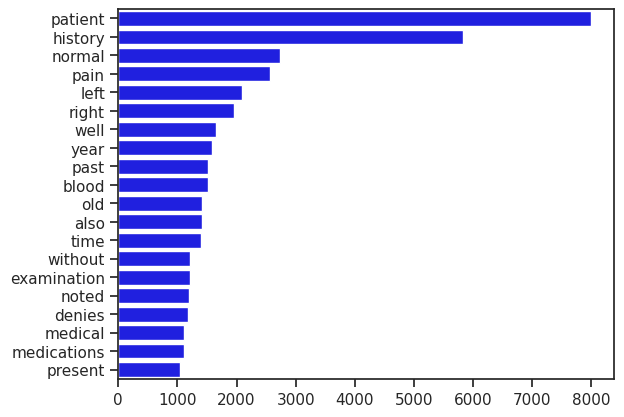

In [103]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [104]:
# pip install plotly
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Search Specific words

In [106]:
# Show frequency of a specific word
# admissions, diseases, or phenotypes
fdist["medical"]

1115

### Word Cloud

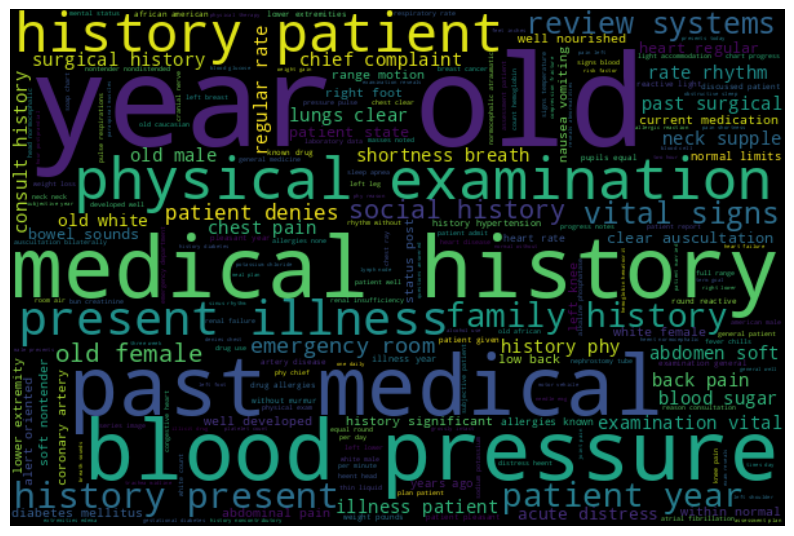

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## VADER lexicon

NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

### Sentiment Intensity Analyzer

Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

In [108]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores


Lets engage the polarity_scores method:

In [110]:
metadata['polarity'] = metadata['extract_string_fdist'].apply(lambda x: 
                                                              analyzer.polarity_scores(x))
metadata.tail(5)

/tmp/ipykernel_27350/2977317155.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,text,extract,extract_token,extract_string,extract_string_fdist,polarity
1083,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe...",cardiovascular / pulmonary indications for pr...,"[cardiovascular, pulmonary, indications, proce...",cardiovascular pulmonary indications procedure...,cardiovascular pulmonary indications procedure...,"{'neg': 0.061, 'neu': 0.905, 'pos': 0.034, 'co..."
1084,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a...",obstetrics / gynecology history of present il...,"[obstetrics, gynecology, history, present, ill...",obstetrics gynecology history present illness ...,obstetrics gynecology history present illness ...,"{'neg': 0.145, 'neu': 0.81, 'pos': 0.045, 'com..."
1085,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a...",soap / chart / progress notes history of pres...,"[soap, chart, progress, notes, history, presen...",soap chart progress notes history present illn...,soap chart progress notes history present illn...,"{'neg': 0.143, 'neu': 0.801, 'pos': 0.056, 'co..."
1086,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a...",obstetrics / gynecology history of present il...,"[obstetrics, gynecology, history, present, ill...",obstetrics gynecology history present illness ...,obstetrics gynecology history present illness ...,"{'neg': 0.145, 'neu': 0.81, 'pos': 0.045, 'com..."
1087,Speech - Language,"HISTORY: , The patient is a 67-year-old female...","speech - language history: , the patient is a...","[speech, language, history, patient, 67, year,...",speech language history patient year old femal...,speech language history patient year old femal...,"{'neg': 0.017, 'neu': 0.738, 'pos': 0.245, 'co..."


### Transform data


Change data structure for readabilty

In [111]:
metadata = pd.concat(
    [metadata.drop(['category','text'],axis=1),metadata['polarity'].apply(pd.Series)], axis=1)
metadata.head(3)

,extract,extract_token,extract_string,extract_string_fdist,polarity,neg,neu,pos,compound
0,"general medicine history of present illness:,...","[general, medicine, history, present, illness,...",general medicine history present illness patie...,general medicine history present illness patie...,"{'neg': 0.139, 'neu': 0.812, 'pos': 0.05, 'com...",0.139,0.812,0.050,-0.9843
1,"rheumatology history of present illness: , a ...","[rheumatology, history, present, illness, 71, ...",rheumatology history present illness year old ...,rheumatology history present illness year old ...,"{'neg': 0.123, 'neu': 0.795, 'pos': 0.082, 'co...",0.123,0.795,0.082,-0.9136
2,consult - history and phy. history of present...,"[consult, history, phy, history, present, illn...",consult history phy history present illness pa...,consult history phy history present illness pa...,"{'neg': 0.138, 'neu': 0.812, 'pos': 0.05, 'com...",0.138,0.812,0.050,-0.9843


In [112]:
# Create new variable with sentiment "neutral," "positive" and "negative"
metadata['sentiment'] = metadata['compound'].apply(lambda x: 
                                                   'positive' if x >0 else 'neutral' if x==0 else 'negative')
metadata.head()

,extract,extract_token,extract_string,extract_string_fdist,polarity,neg,neu,pos,compound,sentiment
0,"general medicine history of present illness:,...","[general, medicine, history, present, illness,...",general medicine history present illness patie...,general medicine history present illness patie...,"{'neg': 0.139, 'neu': 0.812, 'pos': 0.05, 'com...",0.139,0.812,0.050,-0.9843,negative
1,"rheumatology history of present illness: , a ...","[rheumatology, history, present, illness, 71, ...",rheumatology history present illness year old ...,rheumatology history present illness year old ...,"{'neg': 0.123, 'neu': 0.795, 'pos': 0.082, 'co...",0.123,0.795,0.082,-0.9136,negative
2,consult - history and phy. history of present...,"[consult, history, phy, history, present, illn...",consult history phy history present illness pa...,consult history phy history present illness pa...,"{'neg': 0.138, 'neu': 0.812, 'pos': 0.05, 'com...",0.138,0.812,0.050,-0.9843,negative
3,"consult - history and phy. chief complaint:,1...","[consult, history, phy, chief, complaint, 1, i...",consult history phy chief complaint infection ...,consult history phy chief complaint infection ...,"{'neg': 0.26, 'neu': 0.64, 'pos': 0.1, 'compou...",0.260,0.640,0.100,-0.9927,negative
4,"dermatology subjective:, this is a 29-year-o...","[dermatology, subjective, 29, year, old, vietn...",dermatology subjective year old vietnamese fem...,dermatology subjective year old vietnamese fem...,"{'neg': 0.077, 'neu': 0.834, 'pos': 0.088, 'co...",0.077,0.834,0.088,0.1531,positive


### Analyze data


Title with highest positive sentiment

In [113]:
metadata.loc[metadata['compound'].idxmax()].values

array([" gastroenterology history:  ,the patient is a 76-year-old male, with previous history of dysphagia, status post stroke.  the patient stated that he was at hospital, secondary to his stroke, where he had his initial modified barium swallow study.  the patient stated that the results of that modified revealed aspiration with thin liquids only.  he is currently eating and drinking without difficulty and he feels that he can return to a regular diet with thin liquids.  a modified barium swallow study was ordered to objectively evaluate the patient's swallowing function and safety and to rule out aspiration.,study: , modified barium swallow study was performed in the radiology suite in cooperation with dr. x. the patient was seated upright and in a video-imaging chair throughout this assessment.,to evaluate the patient's swallowing function and safety, he was administered graduated amounts of liquid and food mixed with barium in the form of thin liquids (teaspoon x3, cup sip x3); ne

Title with highest negative sentiment

In [114]:
metadata.loc[metadata['compound'].idxmin()].values

array([' emergency room reports reason for consultation: , left hip fracture.,history of present illness: , the patient is a pleasant 53-year-old female with a known history of sciatica, apparently presented to the emergency room due to severe pain in the left lower extremity and unable to bear weight.  history was obtained from the patient.  as per the history, she reported that she has been having back pain with left leg pain since past 4 weeks.  she has been using a walker for ambulation due to disabling pain in her left thigh and lower back.  she was seen by her primary care physician and was scheduled to go for mri yesterday.  however, she was walking and her right foot got caught on some type of rug leading to place excessive weight on her left lower extremity to prevent her fall.  since then, she was unable to ambulate.  the patient called paramedics and was brought to the emergency room.  she denied any history of fall.  she reported that she stepped the wrong way causing the p

### Visualize data

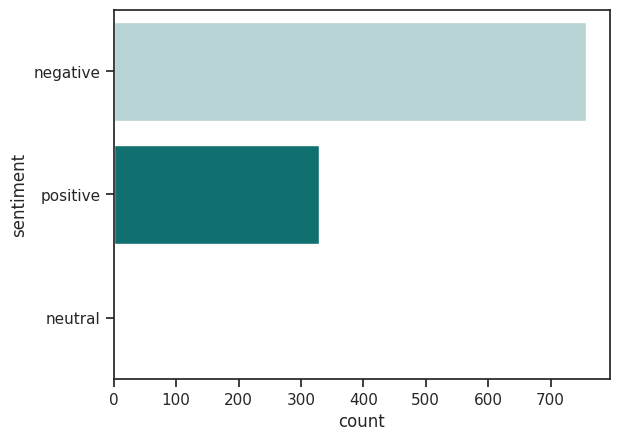

In [115]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=metadata, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

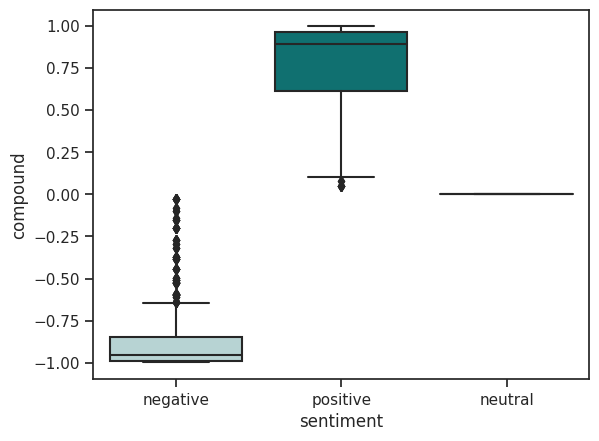

In [116]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=metadata);

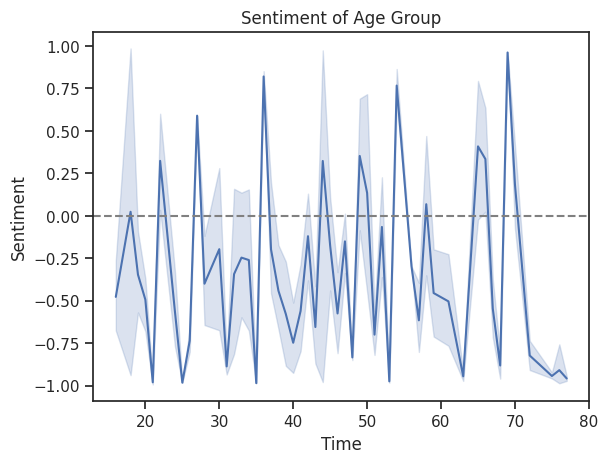

In [120]:
# Lineplot
g = sns.lineplot(x=pt_notes['age_year'], y=metadata['compound'])


g.set(title='Sentiment of Age Group')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

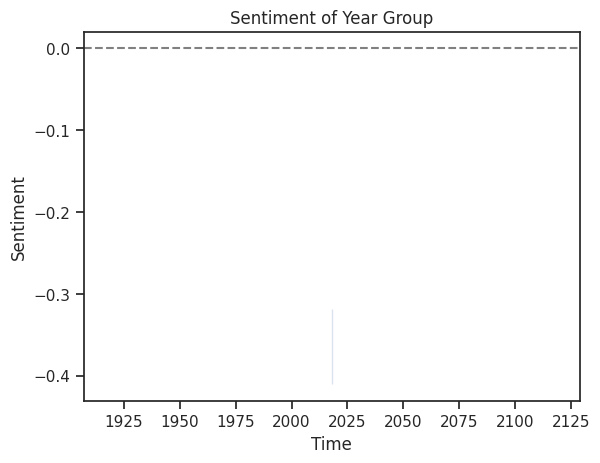

In [127]:
# Lineplot
g = sns.lineplot(x=pt_notes['dob_year'], y=metadata['compound'])


g.set(title='Sentiment of Year Group')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

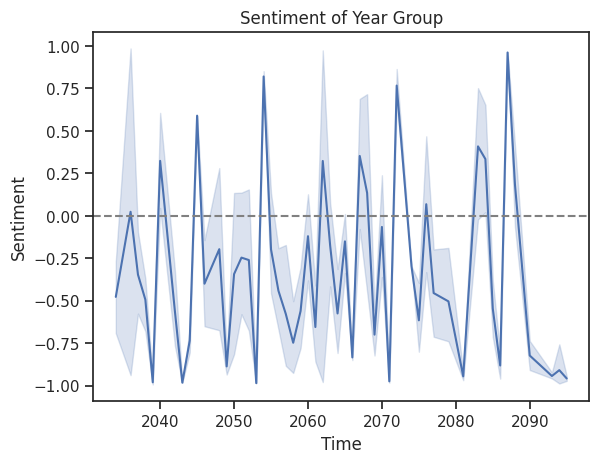

In [121]:
# Lineplot
g = sns.lineplot(x=pt_notes['create_year'], y=metadata['compound'])


g.set(title='Sentiment of Year Group')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

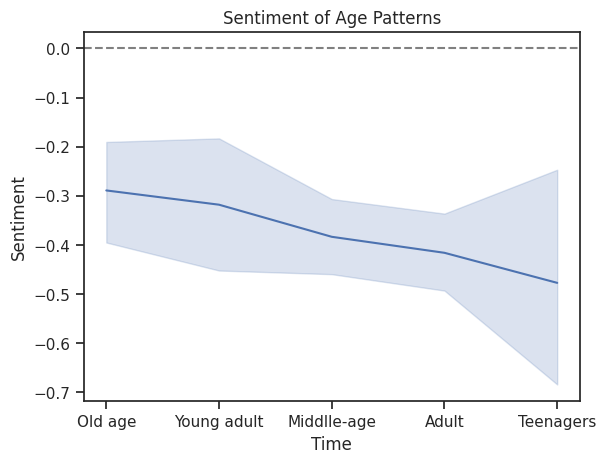

In [122]:
# Lineplot
g = sns.lineplot(x=pt_notes['Age_patterns'], y=metadata['compound'])


g.set(title='Sentiment of Age Patterns')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

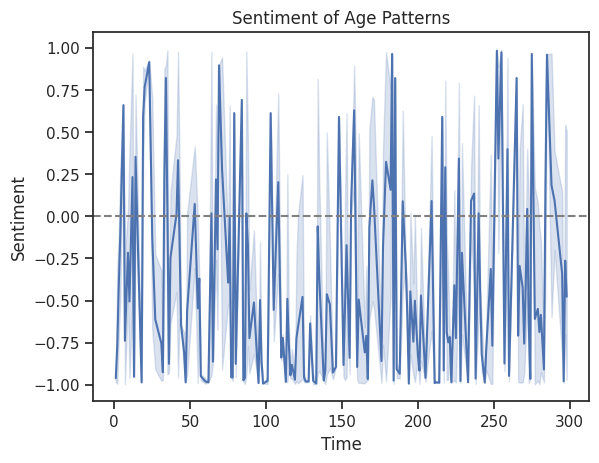

In [126]:
# Lineplot
g = sns.lineplot(x=pt_notes['subject_id'], y=metadata['compound'])


g.set(title='Sentiment of Age Patterns')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');